Treść algorytmu:
    1. x = początkowa wartość losowo wybrana z przedziału zakres_zmienności,
    2. y = wartość funkcji przystosowania (tutaj sin(x/10.0).*sin(x./200)),
    3. wykonaj pętlę l_iteracji razy
        1. xpot = x + zmienna losowa z przedziału [-rozrzut; +rozrzut],
        2. jeśli wartość parametru xpot przekroczyła dozwolony przedział (zakres_zmienności) należy go skorygować wybraną przez siebie metodą.
        3. ypot = funkcja przystosowania dla xpot ,
        4. jeśli uzyskano nie gorszy wynik (ypot >= y)
            1. zastąp stare wartości nowymi (x = xpot; y = ypot)
            2. zwiększ rozrzut o wsp_przyrostu (rozrzut *= wsp_przyrostu)
        5. jeśli uzyskano gorszy wynik (ypot < y)
            1. zmniejsz rozrzut o wsp_przyrostu (rozrzut /= wsp_przyrostu)

Raport dot. alg. 1+1
1. Proszę wylosować wartość x, rozrzut=10 z przedziału dostępności, następnie pokazać jak zmieniają się na początku, po 5, po 10 i po 15 wartości: x (nie xpot ) , y
2. Proszę wylosować inną wartość x z przedziału dostępności, rozrzut=10, następnie pokazać jak zmieniają się na początku i po kolejnych 20 krokach wartości:  y, rozrzut.
3. Proszę jako wartość początkową wylosować liczbę z przedziału [15;35] i rozrzut 5, zakres dostępny zmian wartości x jest bez zmian. Proszę następnie pokazać jak zmieniają się na początku i po kolejnych 20 krokach wartości:  x, y.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from IPython.display import clear_output
import time

In [56]:
def funkcja(x):
    return float(np.sin(x/10) * np.sin(x/200))

In [57]:
def algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji, plot=False):
    x_points = [x]
    y_points = [y]
    dispersions = [rozrzut]
    for l in range(l_iteracji):
        random_number = randint(int(-rozrzut), int(rozrzut))
        xpot = x + random_number
        if xpot<0:
            xpot = 0
        if xpot>100:
            xpot=100
        ypot = funkcja(xpot)
        if ypot >= y:
            x = xpot
            y = ypot
            x_points.append(x)
            y_points.append(y)
            rozrzut *= wsp_przyrostu
        if ypot < y:
            rozrzut /= wsp_przyrostu
        dispersions.append(rozrzut)
    return x_points, y_points, dispersions

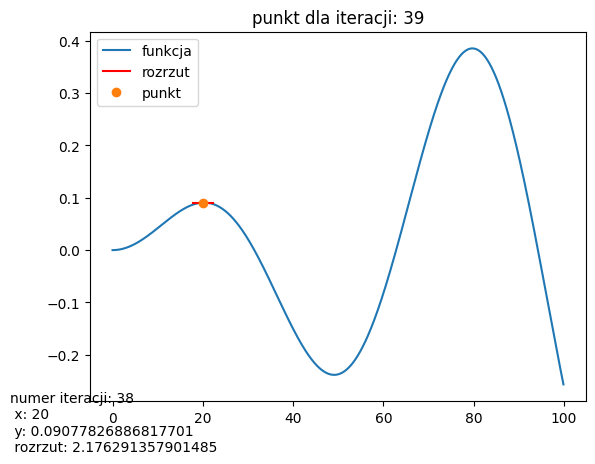

In [58]:
rozrzut = 10
wsp_przyrostu=1.1
l_iteracji=100
x = randint(0, 100)
y = funkcja(x)
x_points, y_points, dispersions = algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji)
for l, (x, y, dispersion) in enumerate(zip(x_points, y_points, dispersions)):
    clear_output()
    x_range = np.arange(0, 100, 0.1)
    y_plot = np.sin(x_range/10) * np.sin(x_range/200)
    plt.plot(x_range, y_plot, label='funkcja')
    plt.plot([x-dispersion, x+dispersion], [y, y], color='r', label='rozrzut')

    plt.plot(x, y, 'o', label='punkt')
    plt.title(f"punkt dla iteracji: {l+1}")
    plt.legend()
    info_text = (
        f"numer iteracji: {l}\n"
        f" x: {x}\n"
        f" y: {y:}\n"
        f" rozrzut: {dispersion}"
    )
    plt.figtext(
        0, 0,
        info_text,
        ha="left",
        va="bottom",
    )
    plt.show()
    time.sleep(0.2)

# Raport dot. alg. 1+1
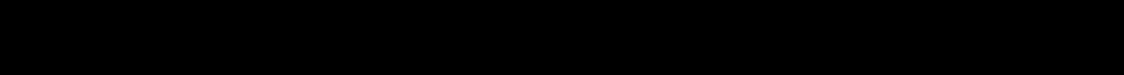

## 1

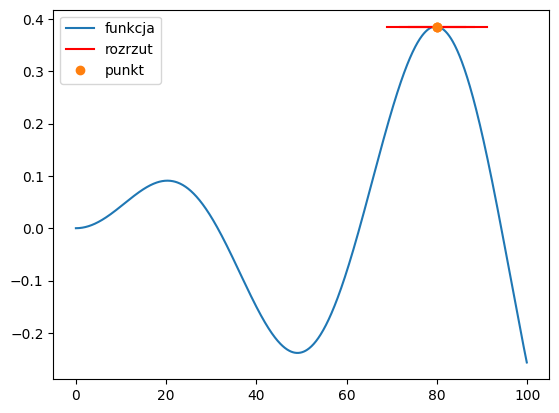

In [59]:
rozrzut = 10
wsp_przyrostu=1.1
l_iteracji=100
x = randint(0, 100)
y = funkcja(x)
x_points, y_points, dispersions = algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji)

x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range/10) * np.sin(x_range/200)
idx = np.array([5, 10, 15])
x_points = np.array(x_points)
y_points = np.array(y_points)
dispersions = np.array(dispersions)
report_points_x = x_points[idx]
report_points_y = y_points[idx]
report_dispersions = dispersions[idx]

plt.plot(x_range, y, label='funkcja')
plt.plot(
    [
        report_points_x[0]-report_dispersions[0],
        report_points_x[0]+report_dispersions[0]
    ],
    [
        report_points_y[0],
        report_points_y[0]
    ],
    color='r',
    label='rozrzut'
)

for x, y, dispersion in zip(report_points_x[1:], report_points_y[1:], report_dispersions[1:]):
    plt.plot([x-dispersion, x+dispersion], [y, y], color='r')
plt.plot(report_points_x, report_points_y, 'o', label='punkt')
plt.legend()
plt.show()

## 2

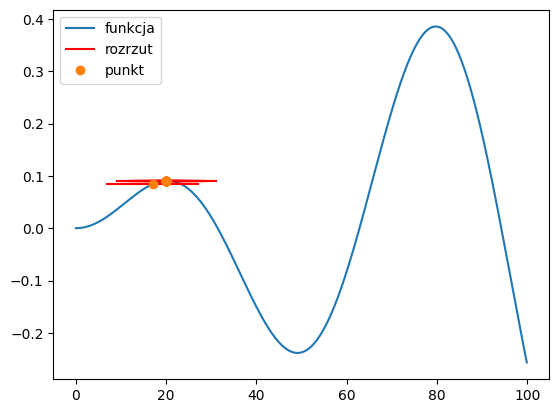

In [60]:
rozrzut = 10
wsp_przyrostu=1.1
l_iteracji=100
x = randint(0, 100)
y = funkcja(x)
x_points, y_points, dispersions = algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji)

x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range/10) * np.sin(x_range/200)
idx = np.arange(0, 20, 1).astype(int)
x_points = np.array(x_points)
y_points = np.array(y_points)
dispersions = np.array(dispersions)
report_points_x = x_points[idx]
report_points_y = y_points[idx]
report_dispersions = dispersions[idx]

plt.plot(x_range, y, label='funkcja')
plt.plot(
    [
        report_points_x[0]-report_dispersions[0],
        report_points_x[0]+report_dispersions[0]
    ],
    [
        report_points_y[0],
        report_points_y[0]
    ],
    color='r',
    label='rozrzut'
)

for x, y, dispersion in zip(report_points_x[1:], report_points_y[1:], report_dispersions[1:]):
    plt.plot([x-dispersion, x+dispersion], [y, y], color='r')
plt.plot(report_points_x, report_points_y, 'o', label='punkt')
plt.legend()
plt.show()

## 3

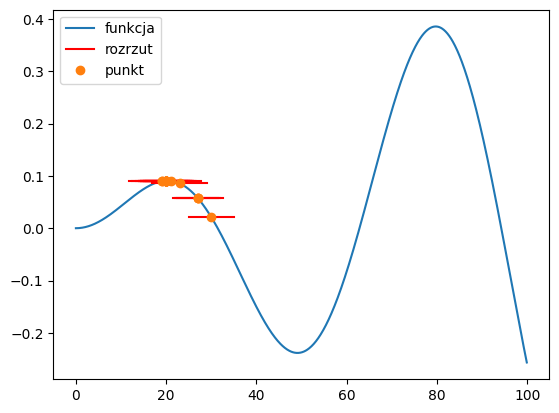

In [61]:
rozrzut = 5
wsp_przyrostu=1.1
l_iteracji=100
x = randint(15, 35)
y = funkcja(x)
x_points, y_points, dispersions = algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji)

x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range/10) * np.sin(x_range/200)
idx = np.arange(0, 20, 1).astype(int)
x_points = np.array(x_points)
y_points = np.array(y_points)
dispersions = np.array(dispersions)
report_points_x = x_points[idx]
report_points_y = y_points[idx]
report_dispersions = dispersions[idx]

plt.plot(x_range, y, label='funkcja')
plt.plot(
    [
        report_points_x[0]-report_dispersions[0],
        report_points_x[0]+report_dispersions[0]
    ],
    [
        report_points_y[0],
        report_points_y[0]
    ],
    color='r',
    label='rozrzut'
)

for x, y, dispersion in zip(report_points_x[1:], report_points_y[1:], report_dispersions[1:]):
    plt.plot([x-dispersion, x+dispersion], [y, y], color='r')
plt.plot(report_points_x, report_points_y, 'o', label='punkt')
plt.legend()
plt.show()